Radhika Sharma Oasis Infobyte Data Science Internship Tasks

# TASK 5: SALES PREDICTION USING PYTHON

Sales prediction means predicting how much of a product people will buy based on factors such as the amount you spend to advertise your product, the segment of people you
advertise for, or the platform you are advertising on about your product.

Sales prediction involves utilizing machine learning techniques in Python to forecast the quantity of a product that people are likely to purchase. This prediction is based on various factors, including advertising expenditure, the target audience, and the advertising platform.For product and service-based businesses, accurate sales predictions are essential for making informed decisions about their advertising costs and strategies. 

In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [34]:
#Read dataset from CSV 
sales_prediction=pd.read_csv("C:\\Users\\DELL\\Documents\\Internship\\Advertising.csv")

In [35]:
sales_prediction

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9
...,...,...,...,...,...
195,196,38.2,3.7,13.8,7.6
196,197,94.2,4.9,8.1,9.7
197,198,177.0,9.3,6.4,12.8
198,199,283.6,42.0,66.2,25.5


In [36]:
#To get a concise summary of the dataset
sales_prediction.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  200 non-null    int64  
 1   TV          200 non-null    float64
 2   Radio       200 non-null    float64
 3   Newspaper   200 non-null    float64
 4   Sales       200 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB


In [37]:
#To generate descriptive statistics 
sales_prediction.describe()

,Unnamed: 0,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000,200.000000
mean,100.500000,147.042500,23.264000,30.554000,14.022500
std,57.879185,85.854236,14.846809,21.778621,5.217457
min,1.000000,0.700000,0.000000,0.300000,1.600000
25%,50.750000,74.375000,9.975000,12.750000,10.375000
50%,100.500000,149.750000,22.900000,25.750000,12.900000
75%,150.250000,218.825000,36.525000,45.100000,17.400000
max,200.000000,296.400000,49.600000,114.000000,27.000000


In [38]:
#To check if dataset contains missing values or not.
sales_prediction.isnull().sum()

Unnamed: 0    0
TV            0
Radio         0
Newspaper     0
Sales         0
dtype: int64

In [39]:
#To analyze duplicate values
sales_prediction.duplicated().sum()

0

In [40]:
#To return the total number of elements in dataset
sales_prediction.size

1000

In [41]:
#To get the dimensions (rows,columns) of the dataset
sales_prediction.shape

(200, 5)

In [42]:
#To show column labels of the dataset
sales_prediction.columns

Index(['Unnamed: 0', 'TV', 'Radio', 'Newspaper', 'Sales'], dtype='object')

In [43]:
#To return a specified number of rows from the top-returns first 5 rows if a number is not specified.
sales_prediction.head()

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [44]:
#To return a specified number of columns from the bottom-returns bottom 5 rows if a number is not specified.
sales_prediction.tail()

,Unnamed: 0,TV,Radio,Newspaper,Sales
195,196,38.2,3.7,13.8,7.6
196,197,94.2,4.9,8.1,9.7
197,198,177.0,9.3,6.4,12.8
198,199,283.6,42.0,66.2,25.5
199,200,232.1,8.6,8.7,13.4


In [45]:
# checking for null values
sales_prediction.isnull().sum()

Unnamed: 0    0
TV            0
Radio         0
Newspaper     0
Sales         0
dtype: int64

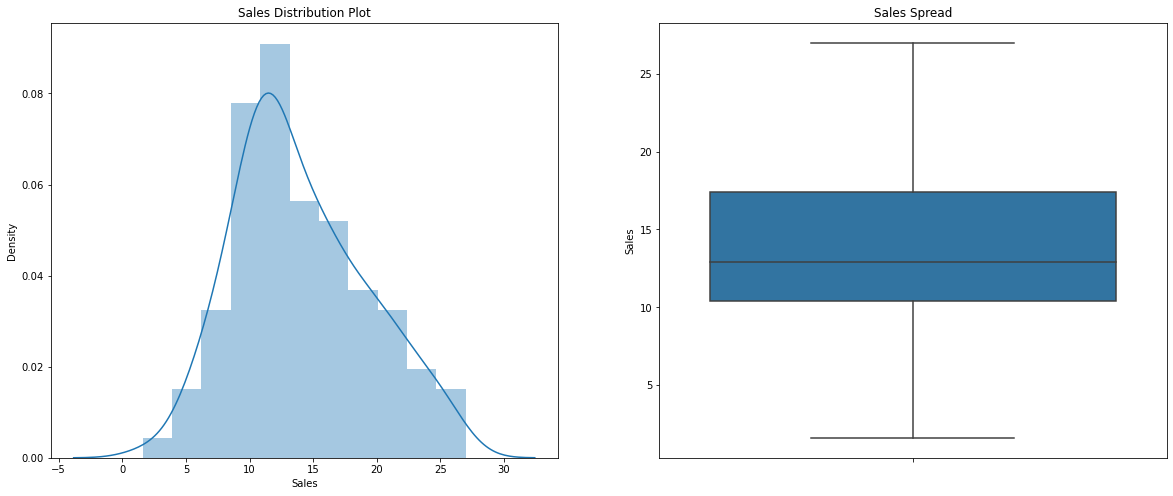

In [46]:
#Analysis of sales distribution and sales speed-subplot and boxplot
plt.figure(figsize=(20,8))
plt.subplot(1,2,1)
plt.title('Sales Distribution Plot')
sns.distplot(sales_prediction['Sales'])
plt.subplot(1,2,2)
plt.title('Sales Spread')
sns.boxplot(y=sales_prediction['Sales'])
plt.show()

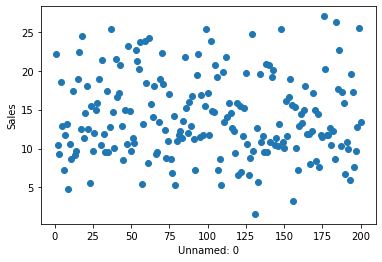

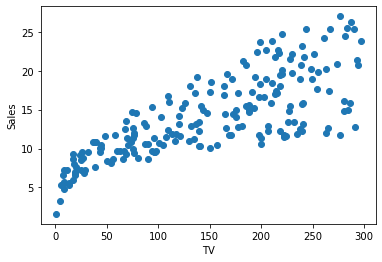

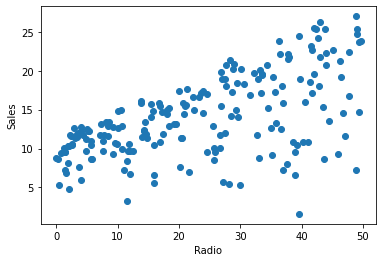

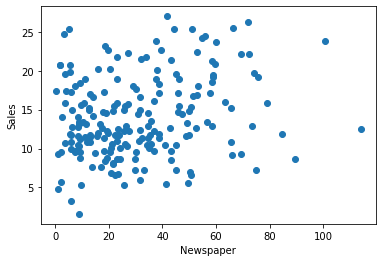

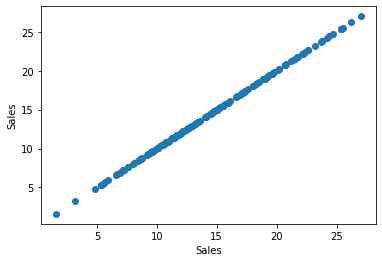

In [47]:
#Analysis of the relationship between independent and dependent features-scatter plot
for feature in sales_prediction.columns:
    plt.scatter(y=sales_prediction['Sales'],x=sales_prediction[feature])
    plt.xlabel(feature)
    plt.ylabel('Sales')
    plt.show()

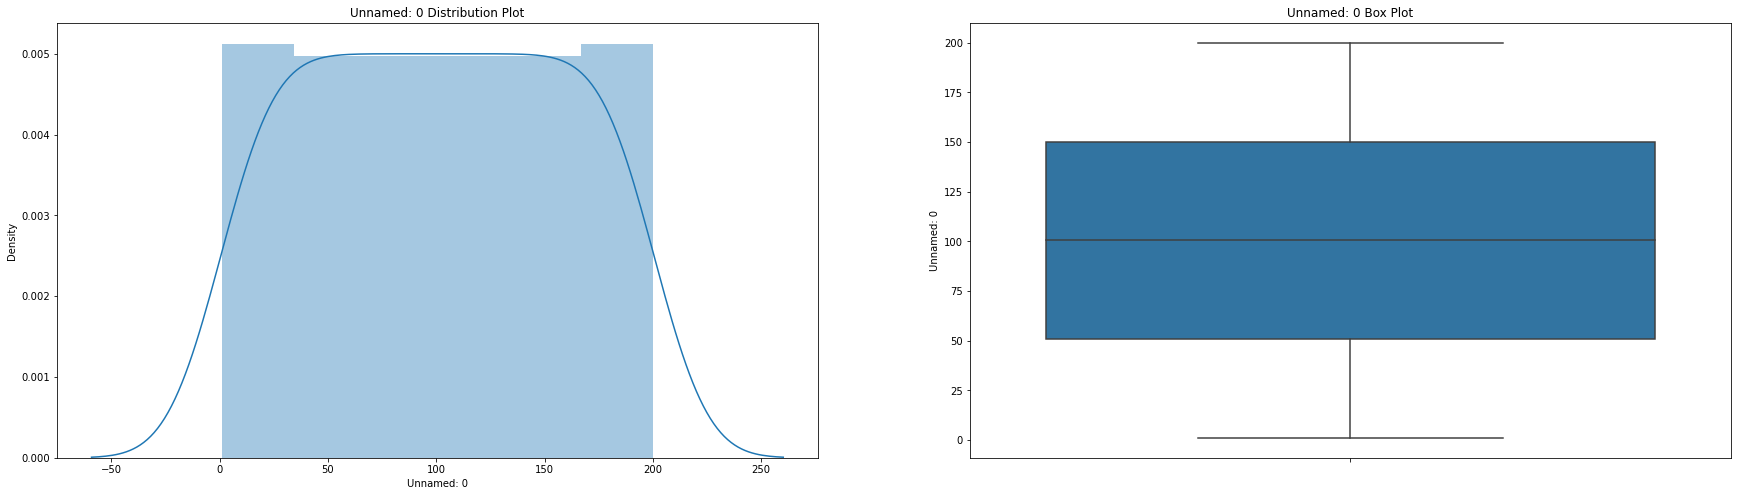

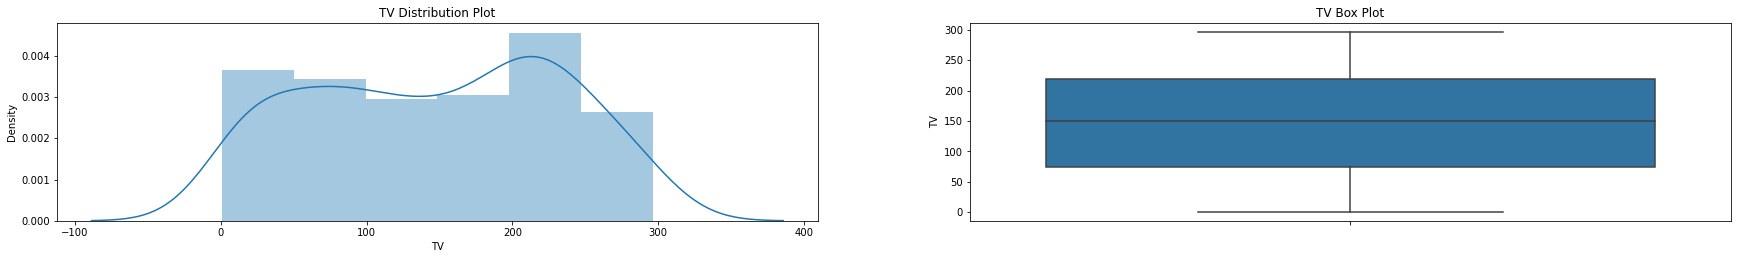

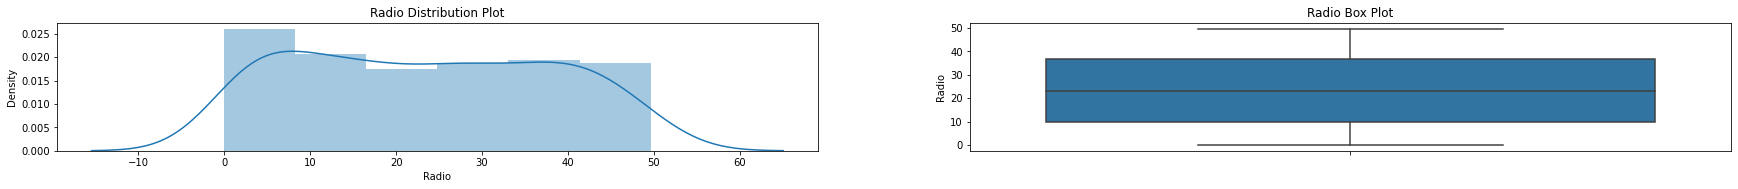

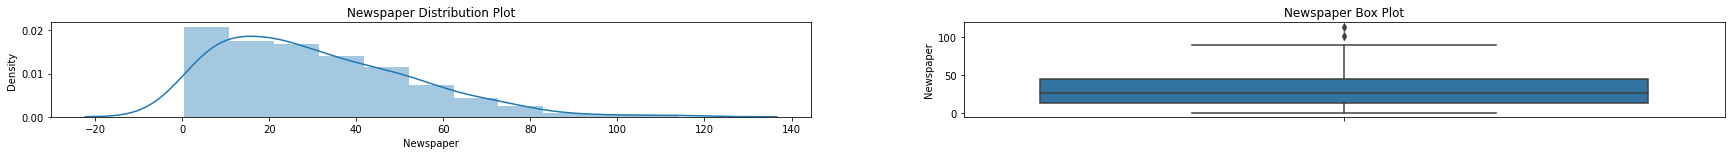

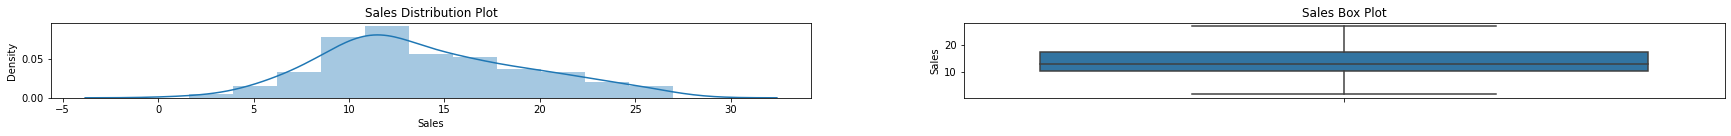

In [48]:
#Sales Prediction Analysis-subplot,displot and boxplot
index = 1
for feature in sales_prediction.columns:
    plt.figure(figsize=(30,8))
    #first plot
    plt.subplot(index,2,1)
    plt.title(feature+" Distribution Plot")
    sns.distplot(sales_prediction[feature])
    # second plot
    plt.subplot(index,2,2)
    plt.title(feature+" Box Plot")
    sns.boxplot(y=sales_prediction[feature])
    index+=1
    plt.show()

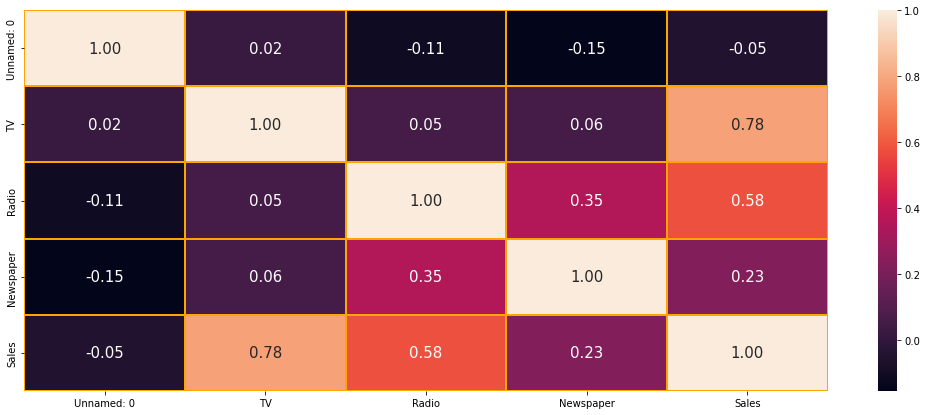

In [49]:
#Heatmap correlation analysis
plt.figure(figsize=(18,7))
sns.heatmap(sales_prediction.corr(), annot=True, fmt='0.2f', annot_kws={'size':15}, linewidths=2, linecolor='orange')
plt.show()

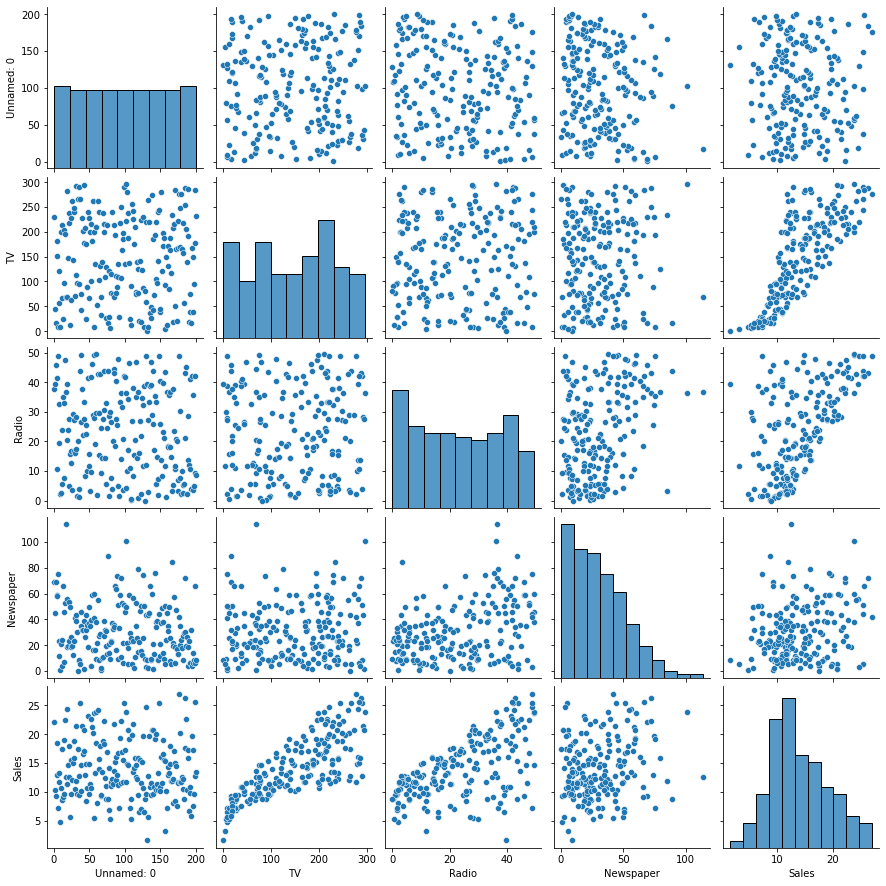

In [56]:
#PairPlot Analysis
sns.pairplot(sales_prediction)
plt.show()

In [57]:
#Splitting the data into training and testing set
X=sales_prediction.drop(columns=['Sales'],axis=1)
y=sales_prediction['Sales']

In [58]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(X,y,random_state=42,test_size=0.2)

In [59]:
print('Training data shape of x and y respectively:',x_train.shape,y_train.shape)
print('Testing data shape of x and y respectively:',x_test.shape,y_test.shape)

Training data shape of x and y respectively: (160, 4) (160,)
Testing data shape of x and y respectively: (40, 4) (40,)


In [60]:
#Model Building
from sklearn.linear_model import LinearRegression
lr_model = LinearRegression()
lr_model.fit(x_train,y_train)

LinearRegression()

In [61]:
y_pred = lr_model.predict(x_test)

In [62]:
#Model Evaluation
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
mse = mean_squared_error(y_pred,y_test)
r2_score = r2_score(y_pred,y_test)

In [63]:
#Accuracy Score 
lr_model.score(x_test,y_test)

0.8986489151417081